In [0]:
from google.colab import drive
drive.mount('content/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at content/


In [1]:
!pip3 install umap-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


In [0]:
def plot_embeddings(embedding, target, message):
  plt.figure(figsize = (10, 10))
  plt.scatter(embedding[:, 0], embedding[:, 1], c = target.ravel(), cmap = 'Spectral', s = 5)
  plt.gca().set_aspect('equal', 'datalim')
  plt.colorbar(boundaries = np.arange(11) - 0.5).set_ticks(np.arange(10))
  plt.title(message)

In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))

# **Visualization**

# **Un-Supervised UMAP on Cifar10**

In [0]:
umap_transformer_U = umap.UMAP(n_components = 2, n_neighbors = 20, verbose = True).fit(X_train)
reduced_umap_train_U = umap_transformer_U.transform(X_train)
reduced_umap_test_U = umap_transformer_U.transform(X_test)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	complet

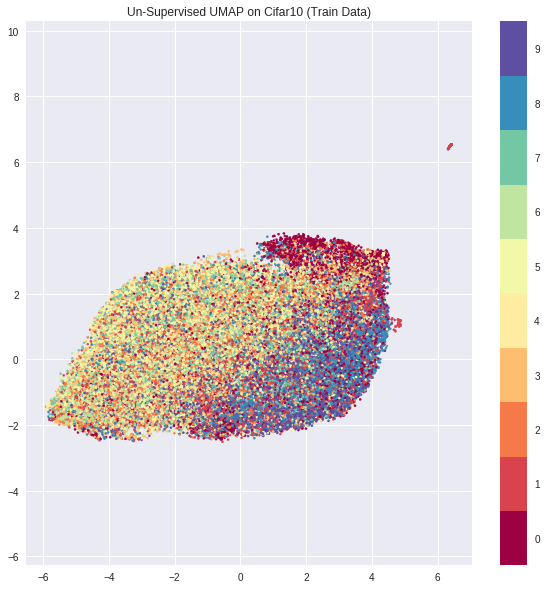

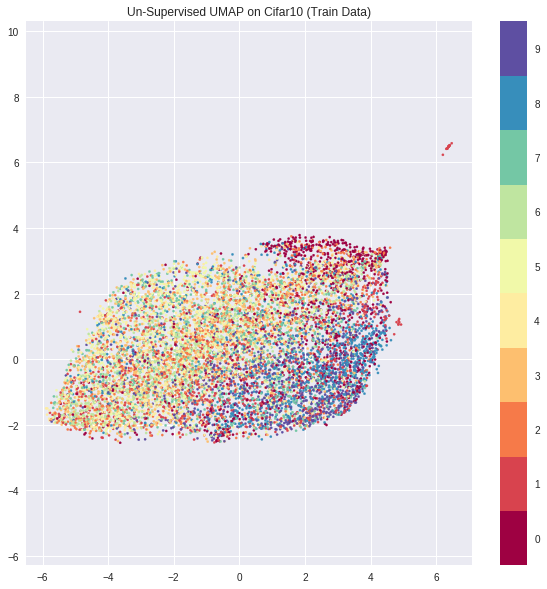

In [0]:
plot_embeddings(reduced_umap_train_U, Y_train, 'Un-Supervised UMAP on Cifar10 (Train Data)')
plot_embeddings(reduced_umap_test_U, Y_test, 'Un-Supervised UMAP on Cifar10 (Train Data)')

# Supervised UMAP on Cifar10

In [0]:
umap_transformer_S = umap.UMAP(n_components = 2, n_neighbors = 20, verbose = True).fit(X_train, Y_train)
reduced_umap_train_S = umap_transformer_S.transform(X_train)
reduced_umap_test_S = umap_transformer_S.transform(X_test)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
Construct embedding


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


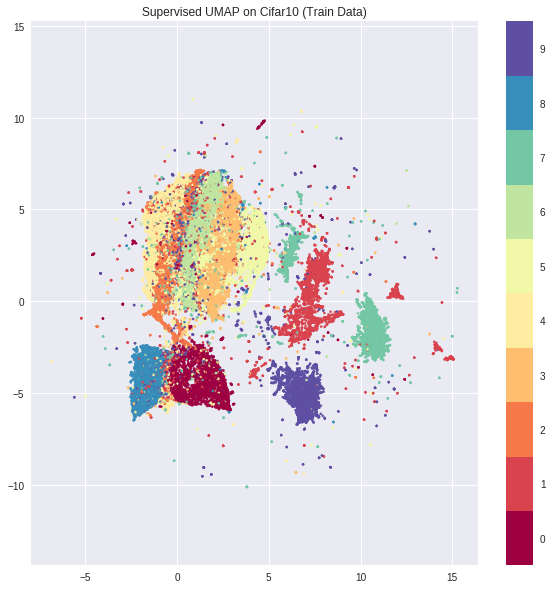

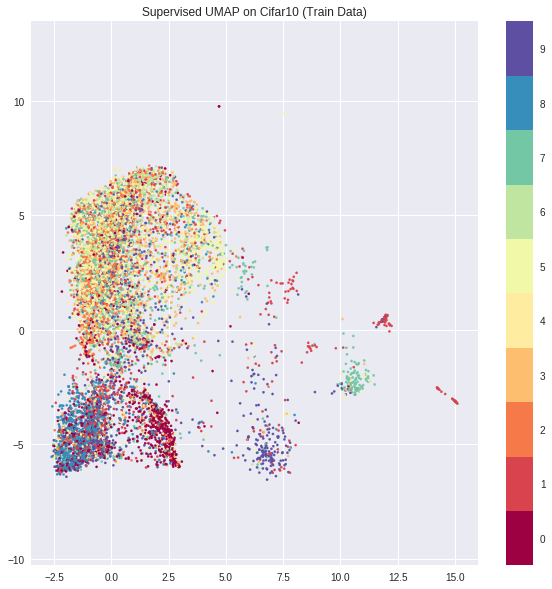

In [0]:
plot_embeddings(reduced_umap_train_S, Y_train, 'Supervised UMAP on Cifar10 (Train Data)')
plot_embeddings(reduced_umap_test_S, Y_test, 'Supervised UMAP on Cifar10 (Train Data)')

# **Auto-Encoder**

In [4]:
inputs = Input(shape = (32, 32, 3))
x = Conv2D(16, (3, 3), padding = 'same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoder = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(64, (3, 3), padding = 'same')(encoder)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
decoder = Activation('sigmoid')(x)

model = Model(inputs, decoder)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
__________

In [0]:
filepath = 'autoencoder.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [0]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
X_dev = X_test[:7000]
X_test = X_test[7000:]

In [9]:
autoencoder = model.fit(X_train, X_train,
                    batch_size = 32,
                    epochs = 80,
                    verbose = True,
                    validation_data = (X_dev, X_dev),
                    callbacks = callbacks_list,
                    shuffle=True)

Train on 50000 samples, validate on 7000 samples
Epoch 1/80
50000/50000 [==============================] - 36s 723us/step - loss: 0.0094 - acc: 0.7145 - val_loss: 0.0075 - val_acc: 0.7427

Epoch 00001: val_acc improved from -inf to 0.74271, saving model to autoencoder.hdf5
Epoch 2/80
50000/50000 [==============================] - 35s 709us/step - loss: 0.0071 - acc: 0.7399 - val_loss: 0.0063 - val_acc: 0.7305

Epoch 00002: val_acc did not improve from 0.74271
Epoch 3/80
50000/50000 [==============================] - 37s 745us/step - loss: 0.0063 - acc: 0.7475 - val_loss: 0.0058 - val_acc: 0.7656

Epoch 00003: val_acc improved from 0.74271 to 0.76558, saving model to autoencoder.hdf5
Epoch 4/80
50000/50000 [==============================] - 38s 754us/step - loss: 0.0060 - acc: 0.7517 - val_loss: 0.0053 - val_acc: 0.7250

Epoch 00004: val_acc did not improve from 0.76558
Epoch 5/80
50000/50000 [==============================] - 37s 749us/step - loss: 0.0057 - acc: 0.7556 - val_loss: 0.00

In [10]:
model.evaluate(X_test, X_test, verbose = True)

3000/3000 [==============================] - 1s 172us/step


[0.003402026856938998, 0.7827353515625]

In [0]:
dev_reconstructed = model.predict(X_dev)
test_reconstructed = model.predict(X_test)

In [0]:
def plot(orig, dec, num):
    plt.figure(figsize = (20, 4))

    for i in range(num):
        ax = plt.subplot(2, num, i + 1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, num, i + 1 + num)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()

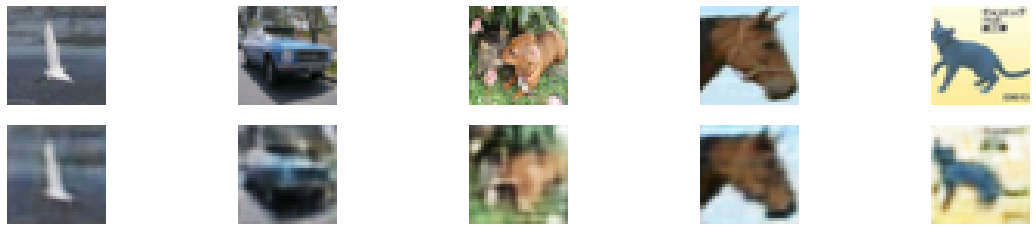

In [14]:
plot(X_test, test_reconstructed, 5)

In [0]:
Encoder = Model(inputs, encoder)

In [0]:
encoded_train = Encoder.predict(X_train)
encoded_test = Encoder.predict(X_test)

In [0]:
encoded_train = encoded_train.reshape((encoded_train.shape[0], encoded_train.shape[1] * encoded_train.shape[2] * encoded_train.shape[3]))
encoded_test = encoded_test.reshape((encoded_test.shape[0], encoded_test.shape[1] * encoded_test.shape[2] * encoded_test.shape[3]))

In [23]:
umap_transformer = umap.UMAP(n_components = 2, n_neighbors = 20, verbose = True).fit(encoded_train, Y_train)
reduced_train = umap_transformer.transform(encoded_train)
reduced_test = umap_transformer.transform(encoded_test)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=20, negative_sample_rate=5, random_state=None,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=True)
Construct fuzzy simplicial set
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	 6  /  16
Construct embedding


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


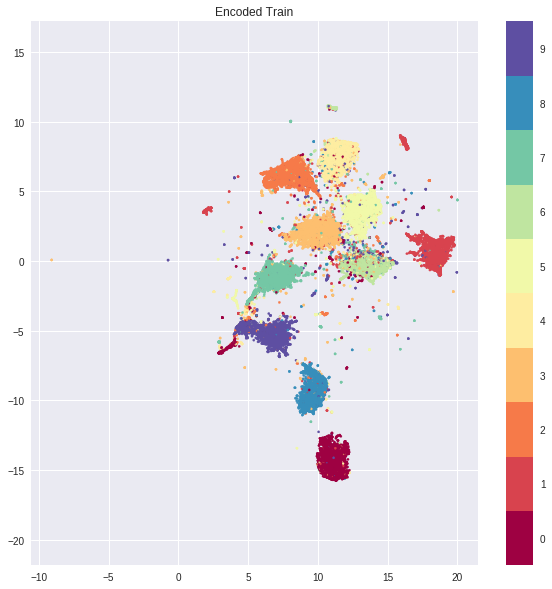

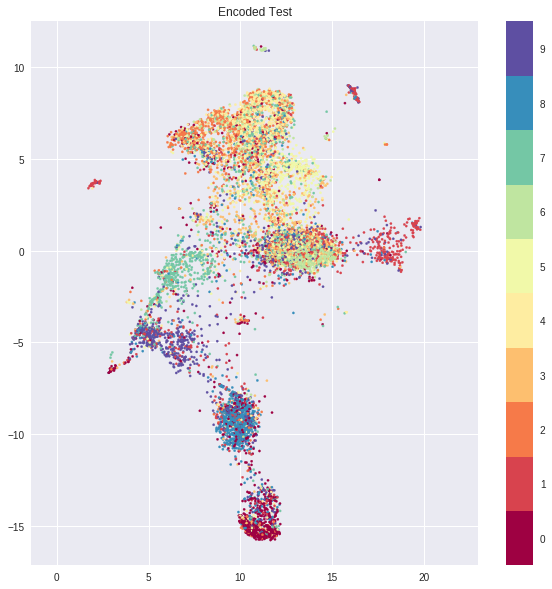

In [24]:
plot_embeddings(reduced_train, Y_train, 'Encoded Train')
plot_embeddings(reduced_test, Y_test, 'Encoded Test')

# Denoising AutoEncoder

In [0]:
noise_factor = 0.5
noisy_train = X_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
noisy_dev = X_dev + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_dev.shape)
noisy_test = X_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X_test.shape)

In [0]:
inputs = Input(shape = (32, 32, 3))
x = Conv2D(16, (3, 3), padding = 'same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(32, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding = 'same')(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoder = MaxPooling2D((2, 2), padding = 'same')(x)

x = Conv2D(64, (3, 3), padding = 'same')(encoder)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
decoder = Activation('sigmoid')(x)

model = Model(inputs, decoder)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae', 'mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 16, 32)        128       
__________

In [0]:
filepath = 'autoencoder.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')
callbacks_list = [checkpoint]

In [0]:
autoencoder = model.fit(noisy_train, X_train,
                    batch_size = 32,
                    epochs = 100,
                    verbose = True,
                    validation_data = (noisy_dev, X_dev),
                    callbacks = callbacks_list,
                    shuffle = True)

In [0]:
model.evaluate(X_test, X_test, verbose = True)

3000/3000 [==============================] - 1s 176us/step


[0.008746718235313892, 0.06890733363231023, 0.008746718270083269]

In [0]:
denoised_dev = model.predict(X_dev)
denoised_test = model.predict(X_test)

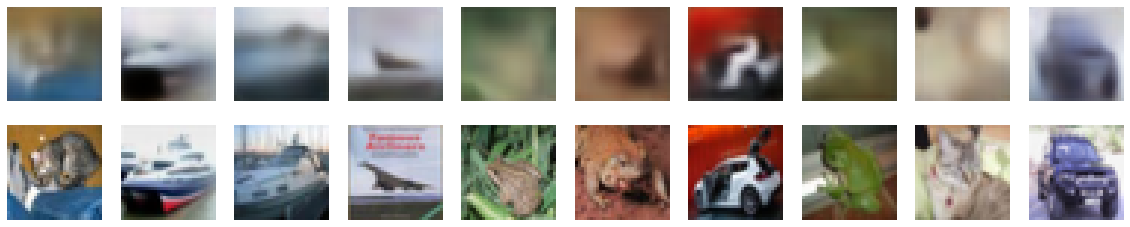

In [0]:
plot(denoised_dev, X_dev, 10)

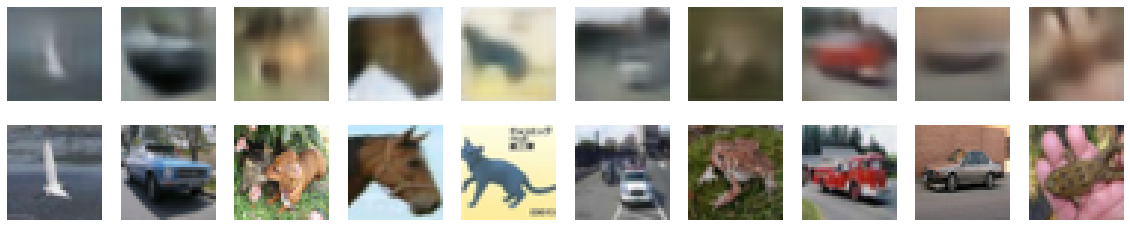

In [0]:
plot(denoised_test, X_test, 10)